In [1]:
from arpes.io import load_data
from arpes.plotting.annotations import annotate_cuts
import os.path

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-12-15_11-39-39.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [2]:
# Define directory
path_bi2223 = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")
bi2223_file = 'FS_AN_P95_*_*_LT_*eVpass_000*.h5'
bi2223_au_ref_file = 'EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0007.h5'

path_bi2212 = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2212")
bi2212_file = 'FS_AN_P16p5_*_*_LT_*eVpass_000*.h5'
bi2212_au_ref_file = 'EDC_X_M0_25eV_CIRCP_LT_20eVpass_GoldRef 3_0000.h5'

path = [path_bi2223]
path.append(path_bi2212)

full_file_bi2223 = os.path.join(path_bi2223, bi2223_file)
full_file_au_bi2223 = os.path.join(path_bi2223, bi2223_au_ref_file)
full_file_bi2212 = os.path.join(path_bi2212, bi2212_file)
full_file_au_bi2212 = os.path.join(path_bi2212, bi2212_au_ref_file)

full_files = [full_file_bi2223, full_file_au_bi2223, full_file_bi2212, full_file_au_bi2212]

In [3]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = []
for full_file in full_files:
    files = [*glob.glob(full_file), *files]
print(files[3])

G:\My Drive\Bi2223\e19557\Box_1_square_renamed\FS_AN_P95_25eV_CIRCP_LT_5eVpass_0000.h5


In [4]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = os.path.basename(file)[:-3]
    data_list.update({file_name : data})

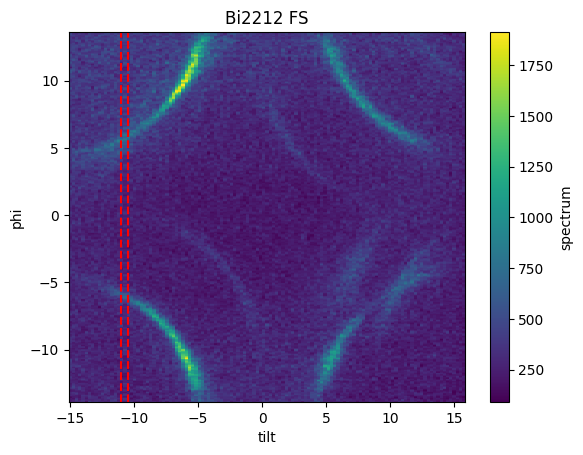

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
bi2212 = data_list[os.path.basename(files[1])[:-3]]
bi2212.spectrum.sel(eV=slice(-0.02,0.02)).sum("eV").plot()
plt.axvline(x=-10.5, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-11, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('Bi2212 FS')
plt.savefig('Plots/Bi2212_vs_Bi2223/FS_Bi2212.png')

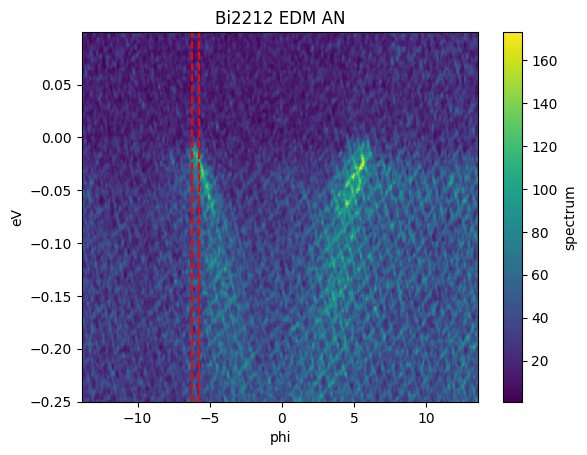

In [6]:
bi2212.spectrum.sel(tilt=slice(-11,-10.5), eV=slice(-0.25,0.1)).sum("tilt").plot()
plt.axvline(x=-5.75, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-6.25, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('Bi2212 EDM AN')
plt.savefig('Plots/Bi2212_vs_Bi2223/EDM_AN_Bi2212.png')

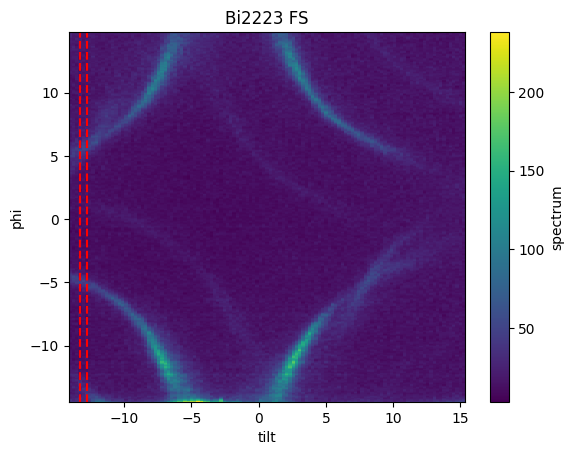

In [7]:
bi2223 = data_list[os.path.basename(files[3])[:-3]]
bi2223.spectrum.sel(eV=slice(-0.02,0.02)).sum("eV").plot()
plt.axvline(x=-12.75, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-13.25, ymin=0, ymax=1, color='red', linestyle='--')
#plt.axvline(x=-2.25, ymin=0, ymax=1, color='white', linestyle='--')
plt.title('Bi2223 FS')
plt.savefig('Plots/Bi2212_vs_Bi2223/FS_Bi2223.png')

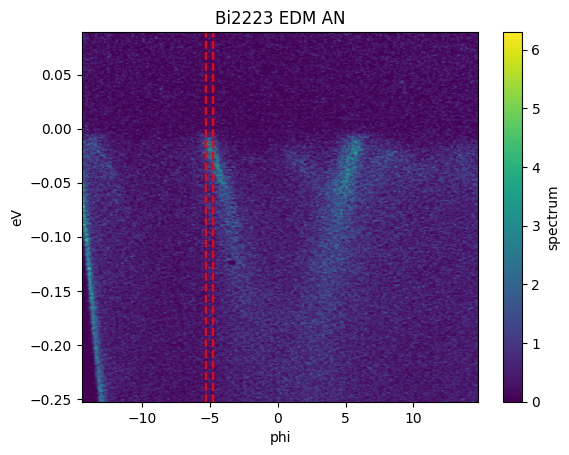

In [8]:
bi2223.spectrum.sel(tilt=slice(-13.25,-12.75)).sum("tilt").plot()
plt.axvline(x=-4.75, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-5.25, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('Bi2223 EDM AN')
plt.savefig('Plots/Bi2212_vs_Bi2223/EDM_AN_Bi2223.png')

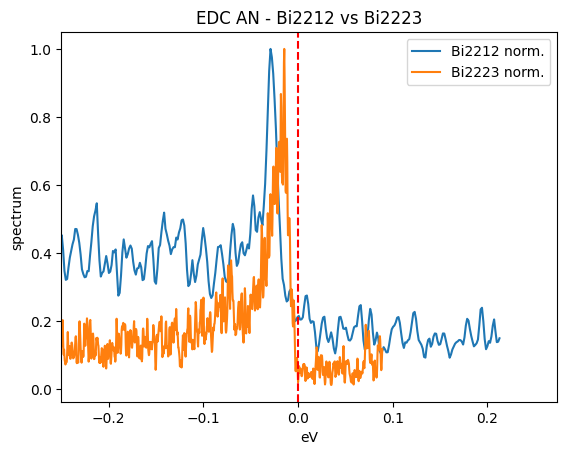

In [9]:
edc_bi2212 = bi2212.spectrum.sel(tilt=slice(-13.5,-13), phi=slice(-5.25,-4.75)).sum("tilt").sum("phi")
edc_bi2223 = bi2223.spectrum.sel(tilt=slice(-13.5,-13), phi=slice(-5.25,-4.75)).sum("tilt").sum("phi")
edc_bi2212_norm = edc_bi2212 / max(edc_bi2212)
edc_bi2223_norm = edc_bi2223 / max(edc_bi2223)
edc_bi2212_norm.plot(label='Bi2212 norm.')
edc_bi2223_norm.plot(label='Bi2223 norm.')
plt.legend()
plt.xlim(-0.25)
plt.axvline(x=0, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('EDC AN - Bi2212 vs Bi2223')
plt.savefig('Plots/Bi2212_vs_Bi2223/EDC_Bi2212_Bi2223.png')

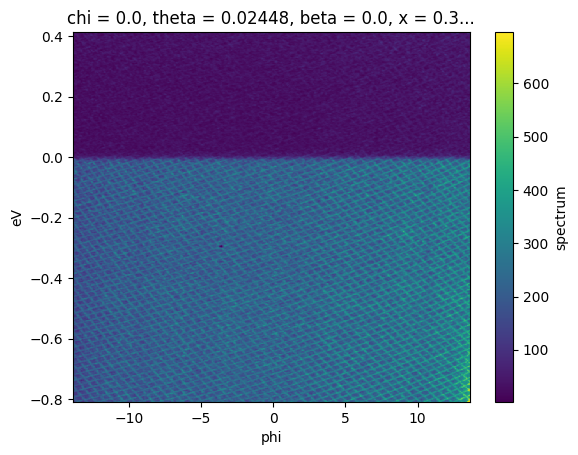

In [10]:
au_bi2212 = data_list[os.path.basename(files[0])[:-3]]
au_bi2212.S.plot()

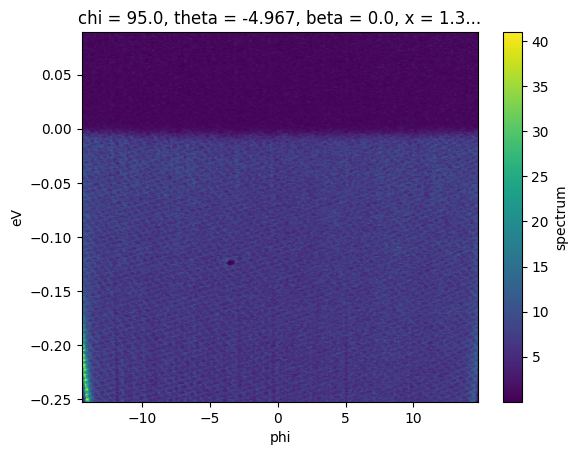

In [11]:
au_bi2223 = data_list[os.path.basename(files[2])[:-3]]
au_bi2223.S.plot()

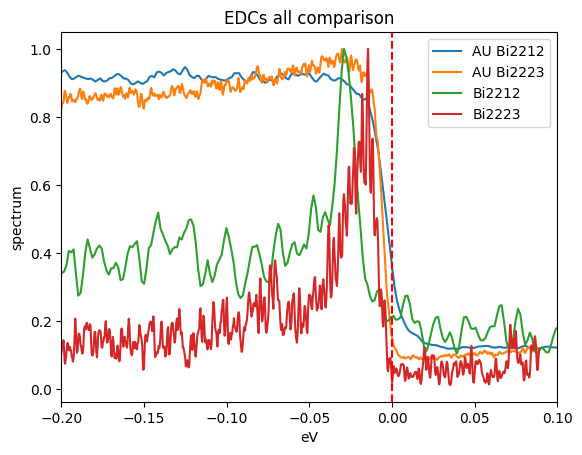

In [13]:
edc_au_bi2212 = au_bi2212.spectrum.sel(phi=slice(-10,10)).sum("phi")
edc_au_bi2223 = au_bi2223.spectrum.sel(phi=slice(-10,10)).sum("phi")
edc_au_bi2212_norm = edc_au_bi2212 / max(edc_au_bi2212)
edc_au_bi2223_norm = edc_au_bi2223 / max(edc_au_bi2223)
edc_au_bi2212_norm.plot(label='AU Bi2212')
edc_au_bi2223_norm.plot(label='AU Bi2223')
edc_bi2212_norm.plot(label='Bi2212')
edc_bi2223_norm.plot(label='Bi2223')
plt.legend()
plt.xlim(-0.2,0.1)
plt.axvline(x=0, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('EDCs all comparison')
plt.savefig('Plots/Bi2212_vs_Bi2223/EDC_all_comparison.png')